# Task - 2
**Shreyan Das**

## Prediction using Unsupervised Learning
**Objective(s):** To predict the optimum number of clusters for the 'Iris' dataset and to represent it visually

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_style('whitegrid')

### The Dataset

In [3]:
from sklearn import datasets
iris_data = datasets.load_iris()
data = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)

In [4]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Elbow Plot

In [7]:
x = data.iloc[:,:].values

In [8]:
from sklearn.cluster import KMeans

In [9]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [10]:
elbow_results = pd.DataFrame({'Clusters':list(range(1,11)),'WCSS Scores':wcss})
elbow_results

,Clusters,WCSS Scores
0,1,681.370600
1,2,152.347952
2,3,78.851441
3,4,57.228473
4,5,46.446182
5,6,39.039987
6,7,34.421674
7,8,29.990426
8,9,28.362571
9,10,26.884053


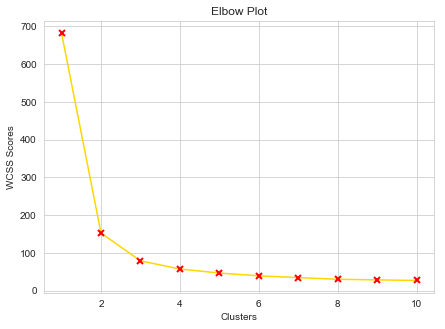

In [11]:
plt.figure(figsize=(7,5))
sns.lineplot(x='Clusters',y='WCSS Scores',data=elbow_results,marker='x',color='gold',mec='red',mew=2)
plt.title("Elbow Plot")
plt.show()

**Observation:** Elbow obtained at k=3. Therefore, optimal number of clusters for given dataset is three.

### Clustering Implementation

In [12]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
y = kmeans.labels_

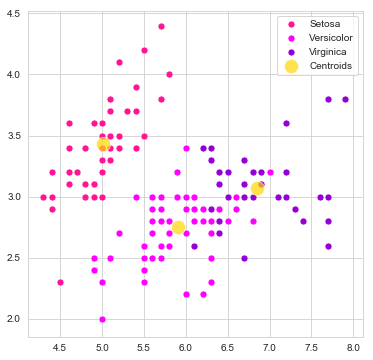

In [14]:
colors = ['deeppink', 'fuchsia' ,'darkviolet']
labels = ['Setosa' , 'Versicolor' , 'Virginica']
plt.figure(figsize=(6,6))

#Plotting clusters by colours
for i in np.unique(kmeans.labels_):
    sns.scatterplot(x=x[y == i,0],y=x[y == i,1],color=colors[i],label=labels[i],s=50)

#Plotting centroids for each cluster
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],
                s = 200, color = 'gold', label = 'Centroids', alpha = 0.7)
plt.show()